# Preparation & Visualization of the suicide data within the Benelux countries
The approach to this problematic data set began with finding the data set containing information and statistics about the suicide rates (male and female) in different countries. The found data set can be found on the following link: https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016?resource=download

Once the data set was found, the suicide rate file contains various different statistics such as the name of the country, year, sex, age group, count of suicides, population, suicide rate, country-year composite key, HDI for year, GDP for year, GDP per capita, and finally the generation (based on age grouping average).
Next step was the data preparation to ensure the quality of data before its usage and visualization. This step started with filtering the data set's 101 different countries information to only three, being the Netherlands, Belgium and Luxembourg, and focusing mostly on the count of suicides. Later on, I will add the division between male and female, and distribute the gathered data by the age groups and generations. After that, I will sort the numbers of suicides within certain age groups filtered by the years they happened in, and finally, create a lineplot for male and female population and the count of suicides. 

Once the notebooks structure was planned, it was time to start coding the program in python. Firstly, preliminary libraries were installed and imported. 

In [2]:
%pip install seaborn

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Since the JupyterLite notebook only allowed me to upload the .csv input file containing the maximum amount of 6026 values and the original dataset contains 27820 values in total, I programmed the code in Python IDLE and ran it on my computer instead of the notebook.

In [ ]:
# Obtain the dataset and store it in a variable and return the top 5 rows to check whether its the right data
dataset = pd.read_csv("C:/Users/reibo/OneDrive/Dokumenti/dokumenti za faks/year 3/machine  learning/Benelux suicides/master.csv")

The input file and the first 5 rows obtained by Python:

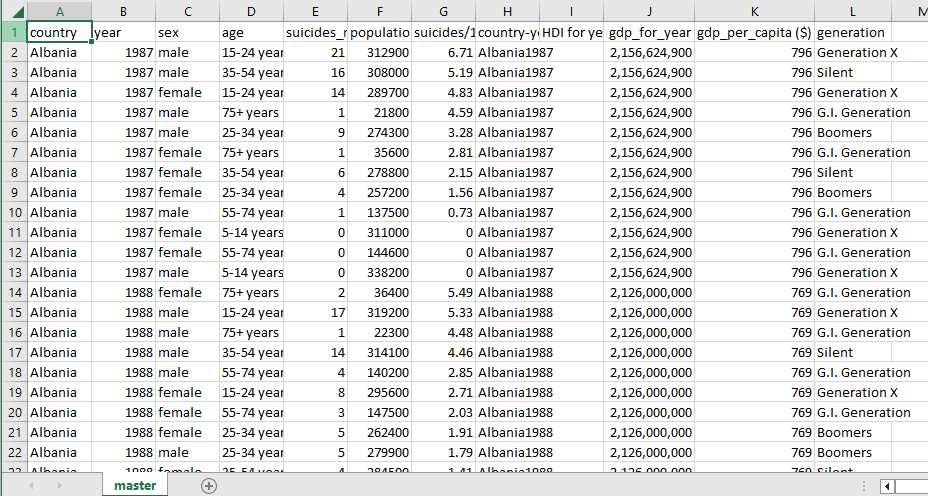 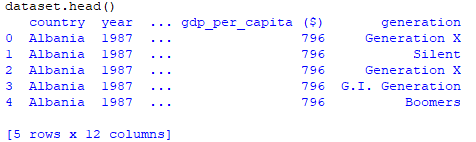


In [ ]:
# Obtain the list of all countries filtered by the name
unique_country = dataset['country'].unique()
print(unique_country)

Gather the data for preparation by putting all countries in a list with respect to their names

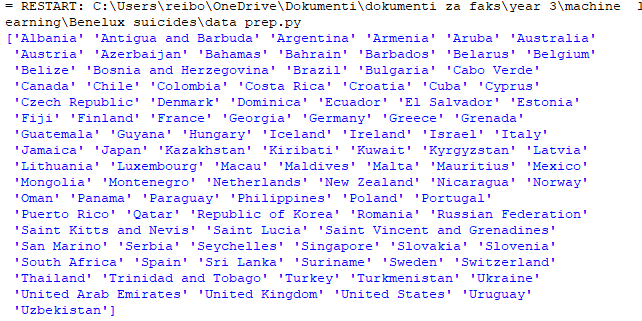

The plot of all data within the dataset by each country (number of rows - statistics)

In [ ]:
# Plot the count of data (rows) per each country
alpha = 0.7
plt.figure(figsize=(10,25))
sns.countplot(y='country', data=dataset, alpha=alpha)
plt.title('Data by country')
plt.show()

In [ ]:
![image.png](attachment:245662c8-2c2d-4acd-8276-c3fd034f1fc9.png)

Now it was time to obtain only the values for the Benelux countries, since I am not interested in other countries' statistics.

In [ ]:
# Gather the values for the Benelux countries
df = dataset
benelux = df[(df['country'].isin(['Belgium', 'Luxembourg', 'Netherlands']))]
print(benelux)


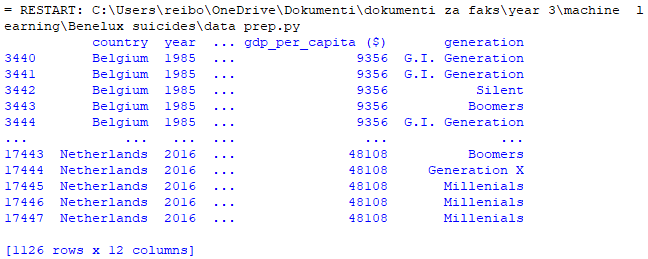

Now let's plot the count of males and females within this newly obtained data

In [ ]:
# Set the figure size
plt.figure(figsize=(16,7))
# Plot the graph
sex = sns.countplot(x='sex',data = benelux)
plt.title('Count by gender')
plt.show()

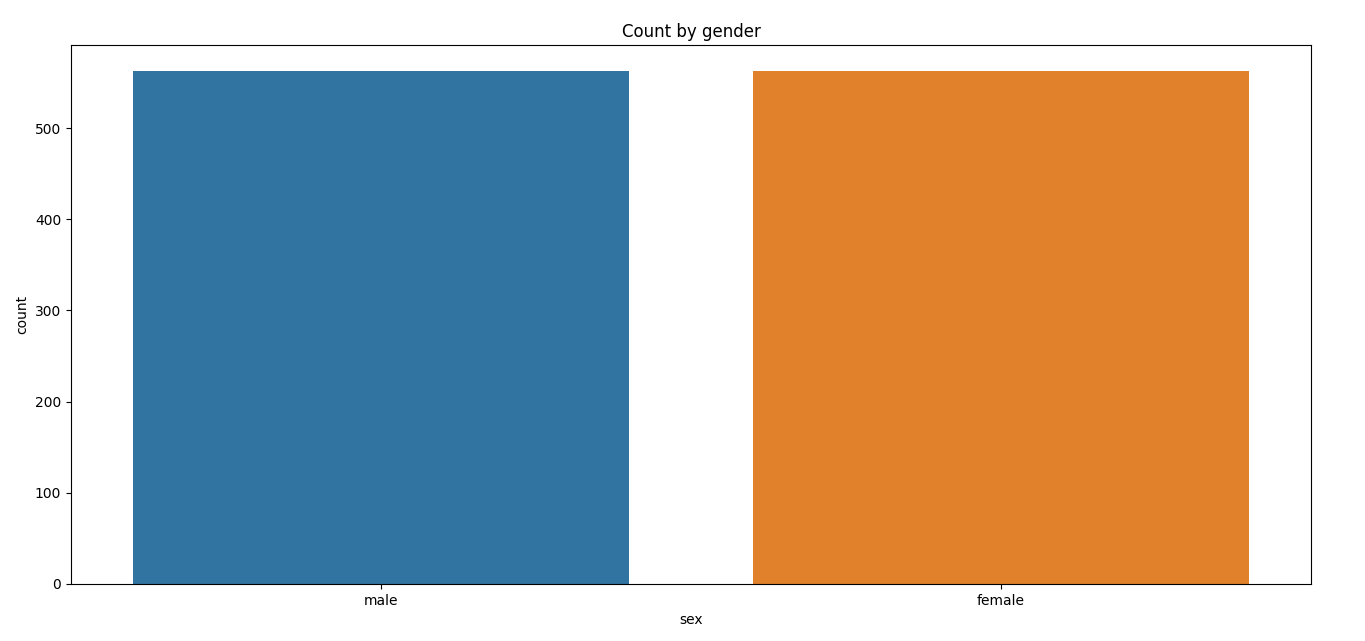

As we can see, the percentage of male and female statistics equals to 50%. Now, to see the correlation between all data from the dataset, I implemented the following code and gathered the figure below:

In [ ]:
# Set the figure size
plt.figure(figsize=(16,7))
# Plot the map
cor = sns.heatmap(dataset.corr(), annot = True)
plt.title('Data correlation')
plt.show()

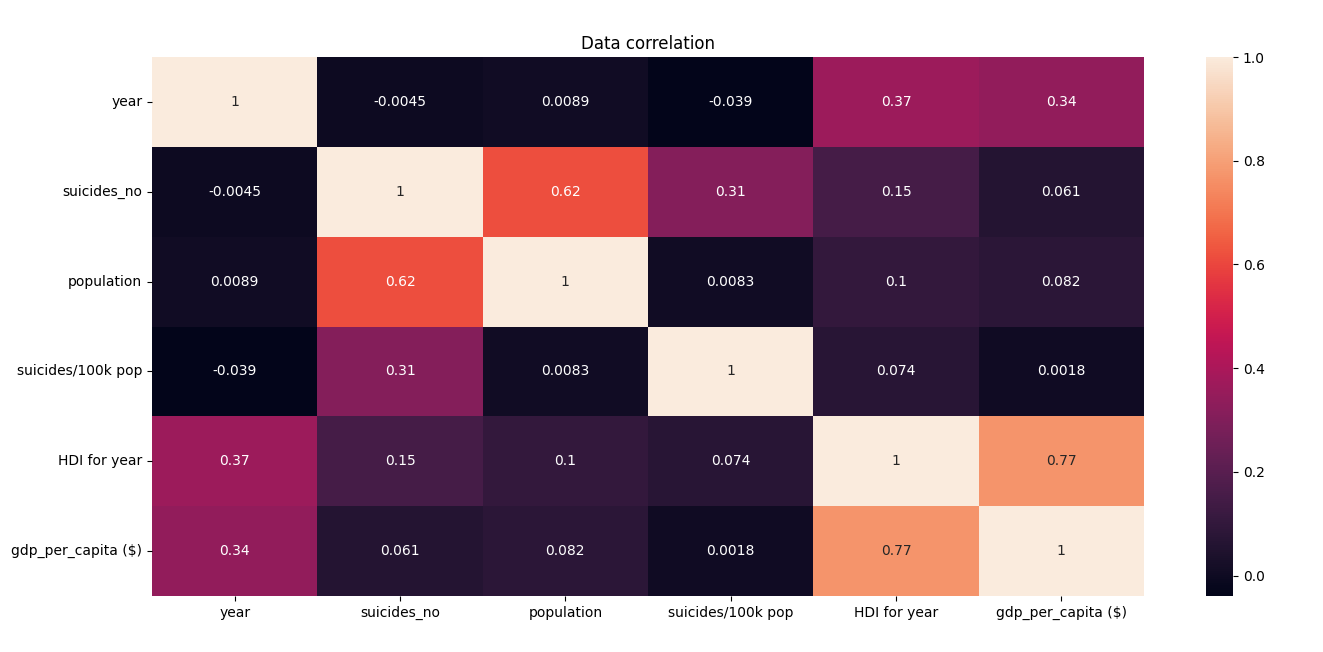

The heatmap above is a representation of the correlations between the features in the data set. Visualizing the data excluded from this heatmap will be done upon one or more of these features. To show at which age people suicide the most, I created a barplot using the values from the number of suicides as y, and the age as x.

In [ ]:
# Set the figure size
plt.figure(figsize=(16,7))
# Plot the graph
bar_age = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = benelux)
plt.title('Suicides by age')
plt.show()

The output barplot looks like this:
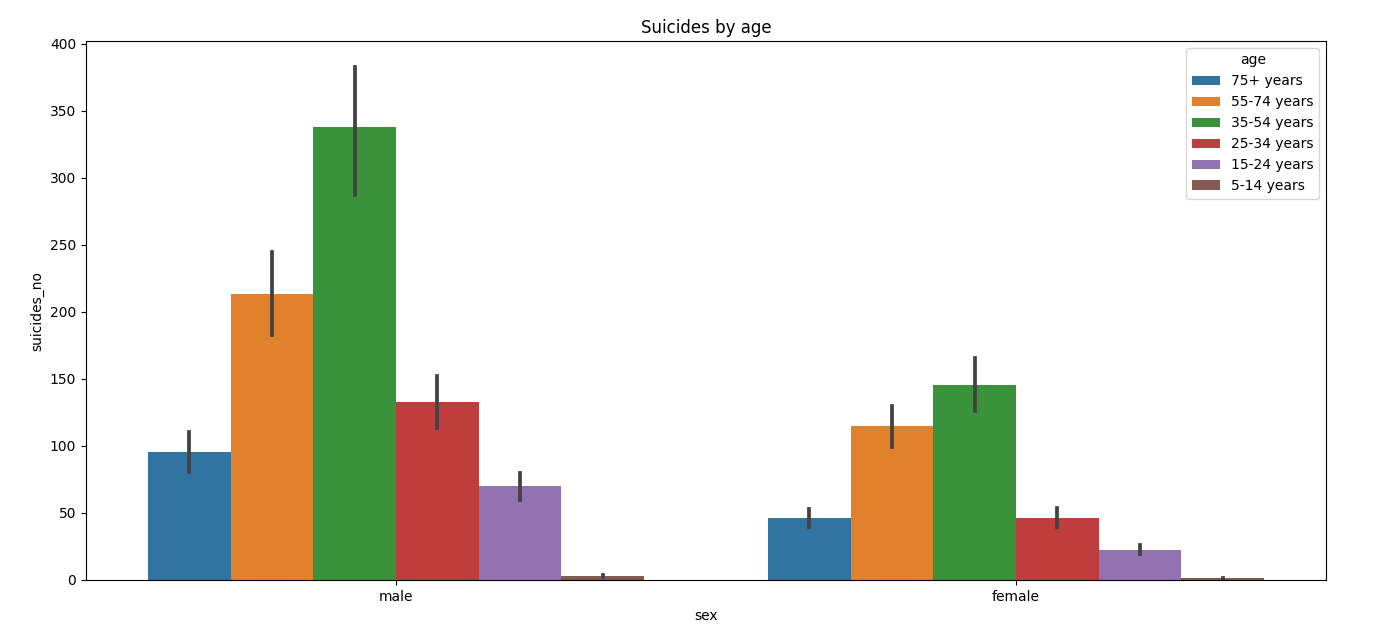

As we can see in the graph, the age group aging from 35 to 54 years has the leading factor in both male and female population, with the people from 5 to 14 years of age having very little suicides within these years. Next up, filtering these suicides by the generations from the dataset was done with the following lines of code:

In [ ]:
# Set the figure size
plt.figure(figsize=(16,7))
# Plot the graph
bar_gen = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'generation',data = benelux)
plt.title('Suicides by generation')
plt.show()

In the Benelux, the generation of so-called "Boomers", has committed the biggest amount of suicides in this time period with the generation Z committing least suicides.
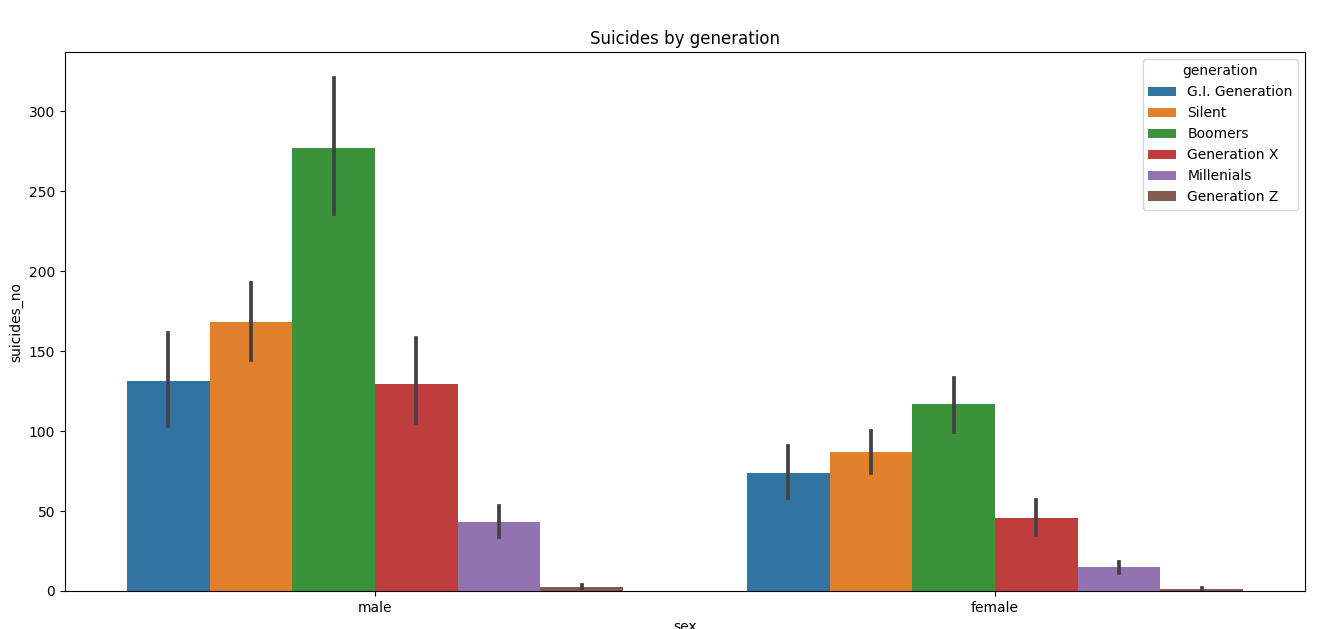

Plotting the numbers of suicides within these age groups for both males and females every year from 1985 to 2016 is done by the following code and the graph can be found below:

In [ ]:
# Set the figure size
plt.figure(figsize=(16,7))
# Plot the graphs
cat_accord_year = sns.catplot(x = 'sex', y = 'suicides_no', hue = 'age', col = 'year', data = benelux, kind = 'bar', col_wrap = 5)
plt.show()

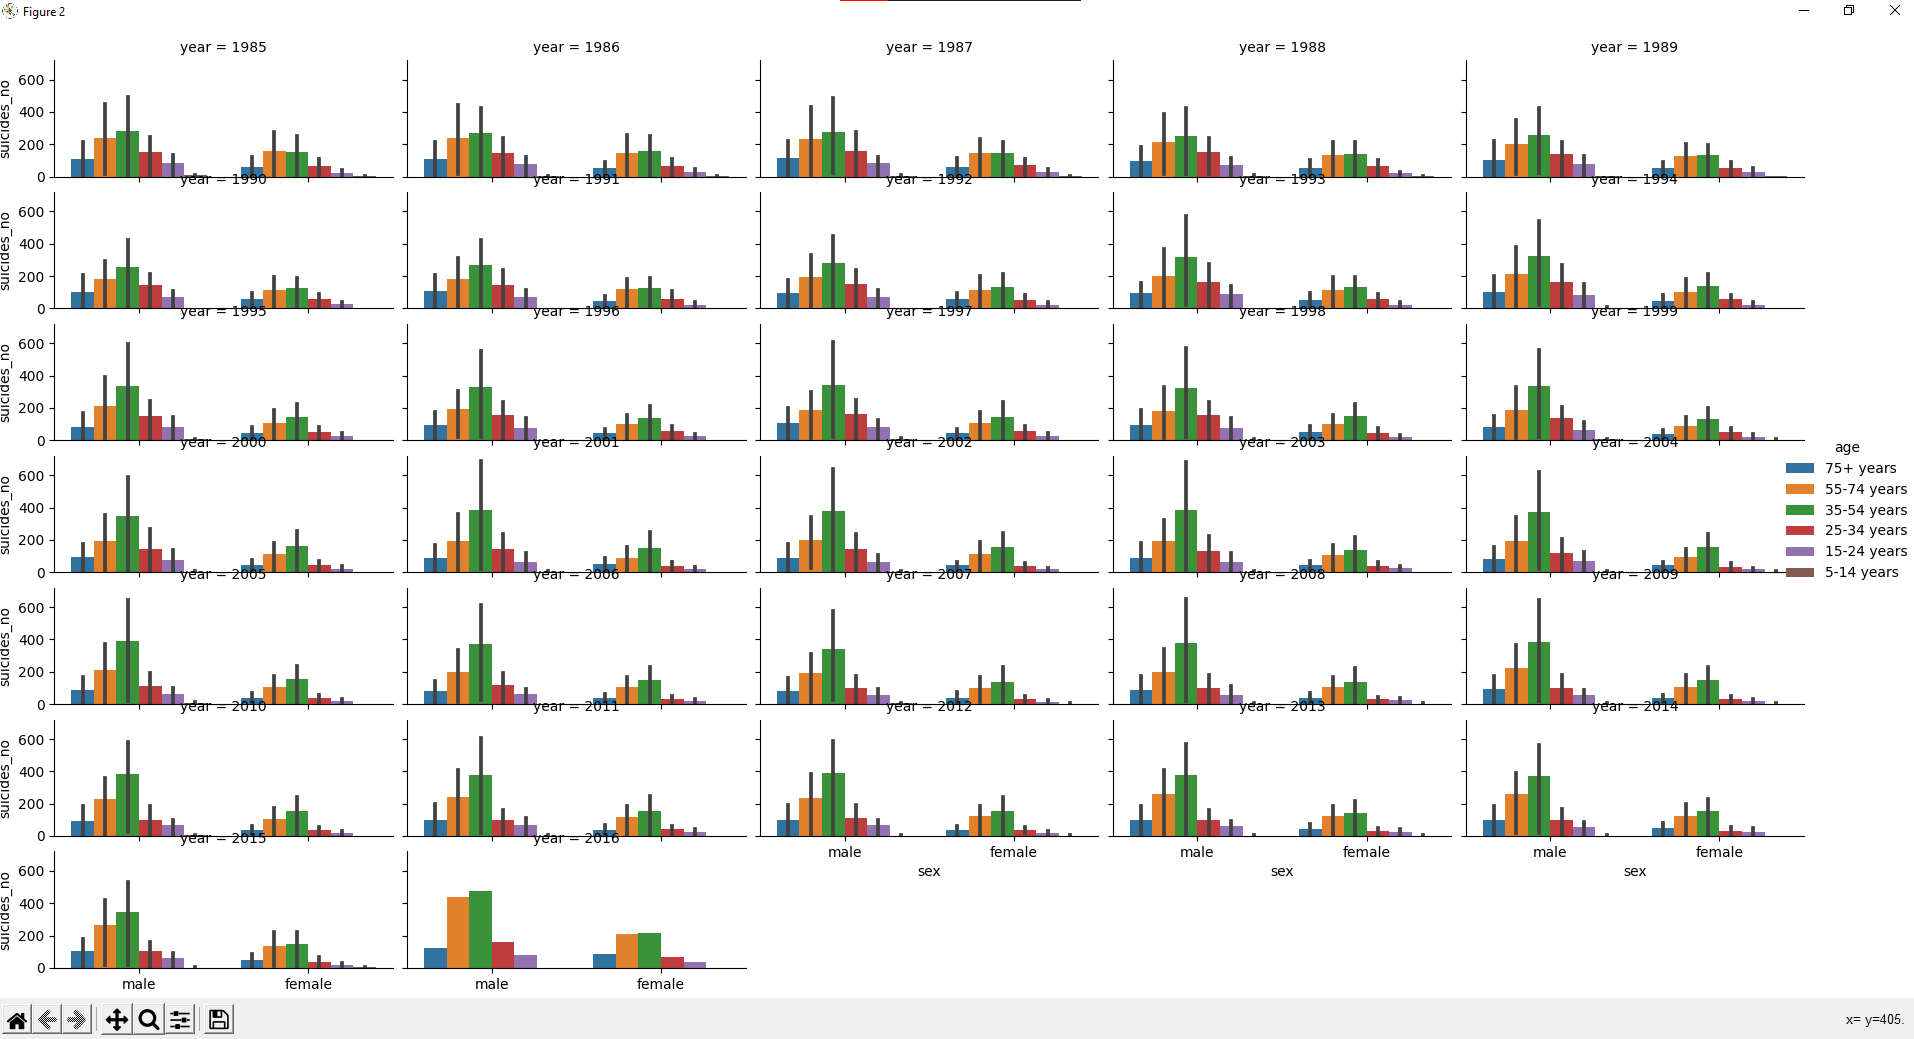

Finally, to display the suicide numbers according to these years with age groups, which will later be divided on the male and female statistics, as a lineplot, I used the next code to obtain the results in the screenshots below it:

In [ ]:
# Store a range of ages corresponding to the age groups in variables so the lineplot is easier to code later
age_5 = benelux.loc[benelux.loc[:, 'age'] == '5-14 years',:]
age_15 = benelux.loc[benelux.loc[:, 'age'] == '15-24 years',:]
age_25 = benelux.loc[benelux.loc[:, 'age'] == '25-34 years',:]
age_35 = benelux.loc[benelux.loc[:, 'age'] == '35-54 years',:]
age_55 = benelux.loc[benelux.loc[:, 'age'] == '55-74 years',:]
age_75 = benelux.loc[benelux.loc[:, 'age'] == '75+ years',:]
# Set the figure size
plt.figure(figsize=(16,7))
# Plot the lines
age_5_line = sns.lineplot(x = 'year', y = 'suicides_no', data = age_5)
age_15_line = sns.lineplot(x = 'year', y = 'suicides_no', data = age_15)
age_25_line = sns.lineplot(x = 'year', y = 'suicides_no', data = age_25)
age_35_line = sns.lineplot(x = 'year', y = 'suicides_no', data = age_35)
age_55_line = sns.lineplot(x = 'year', y = 'suicides_no', data = age_55)
age_75_line = sns.lineplot(x = 'year', y = 'suicides_no', data = age_75)
# Create the legend for lineplotting
leg = plt.legend(['5-14 years', '5-14 years', '15-24 years', '15-24 years', '25-34 years', '25-34 years', '35-54 years', '35-54 years', '55-74 years', '55-74 years', '75+ years', '75+ years'])
plt.title('Suicides over the years within age groups')
plt.show()

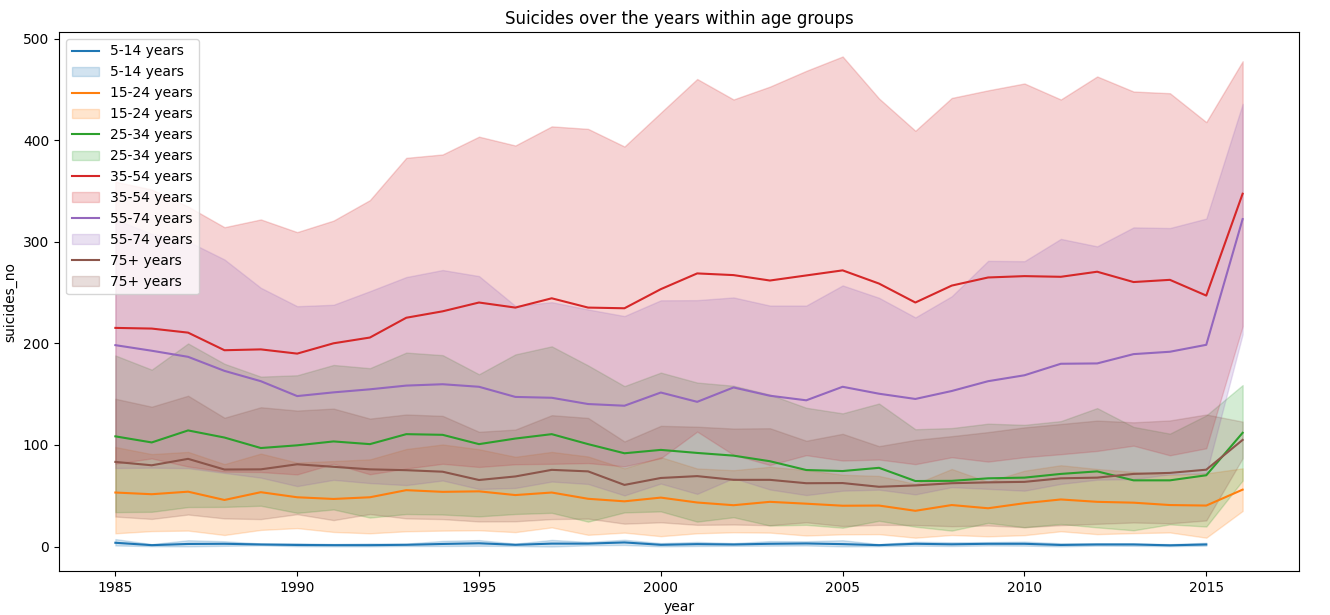

In [ ]:
# Store the male and female values over these years
male_population = benelux.loc[benelux.loc[:, 'sex'] == 'male',:]
female_population = benelux.loc[benelux.loc[:, 'sex'] == 'female',:]
# Plot the lines
lp_male = sns.lineplot(x = 'year' , y = 'suicides_no' , data = male_population)
lp_female = sns.lineplot(x = 'year' , y = 'suicides_no' , data = female_population)
leg = plt.legend(['Males', 'Males',' Females', 'Females'])
plt.title('Suicides over the years by males and females')
plt.show()

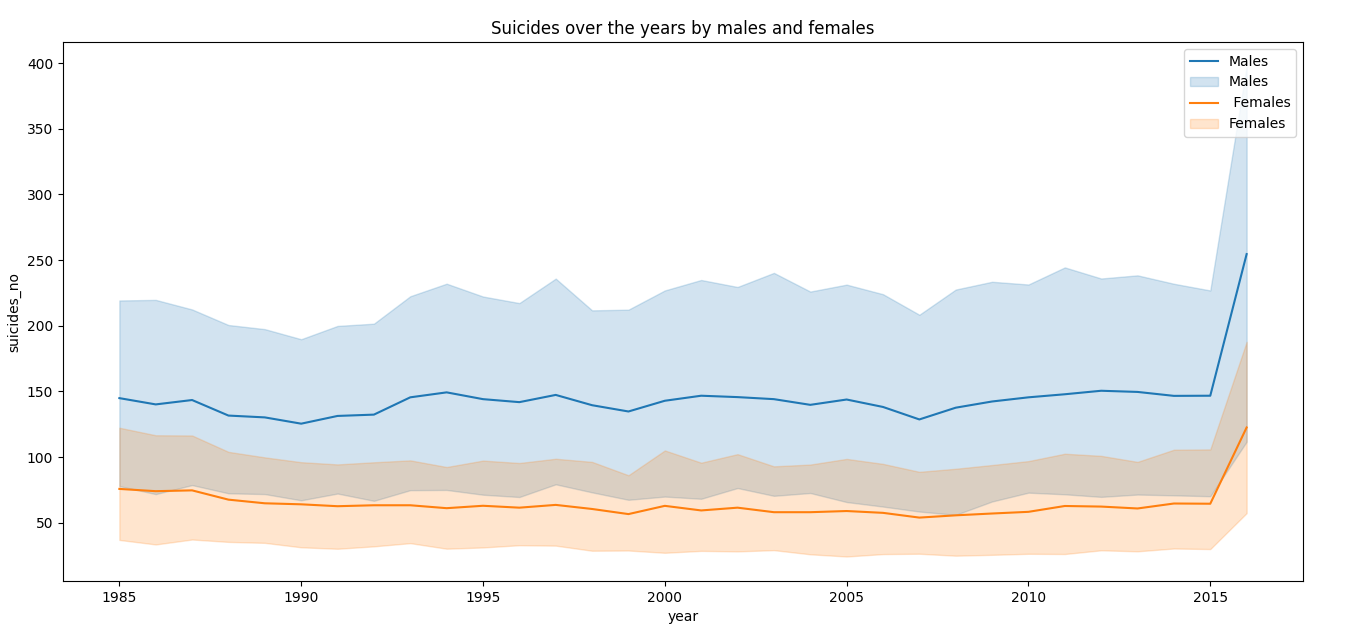

To finalize, I created another lineplot that shows the total amount of suicides done by each of the three countries throughout these years. The code used and the output figure can be found below:

In [ ]:
# Store the countries' values throughout these years
belgium = benelux.loc[benelux.loc[:, 'country'] == 'Belgium',:]
netherlands = benelux.loc[benelux.loc[:, 'country'] == 'Netherlands',:]
luxembourg = benelux.loc[benelux.loc[:, 'country'] == 'Luxembourg',:]
# Set the figure size
plt.figure(figsize=(16,7))
# Plot the lines
lp_belgium = sns.lineplot(x = 'year' , y = 'suicides_no' , data = belgium)
lp_luxembourg = sns.lineplot(x = 'year' , y = 'suicides_no' , data = luxembourg)
lp_netherlands = sns.lineplot(x = 'year' , y = 'suicides_no' , data = netherlands)
# Create the legend for lineplotting
leg = plt.legend(['Belgium', 'Belgium', 'Luxembourg', 'Luxembourg', 'Netherlands', 'Netherlands'])
plt.title('Suicides over the years distributed by the Benelux countries')
plt.show()

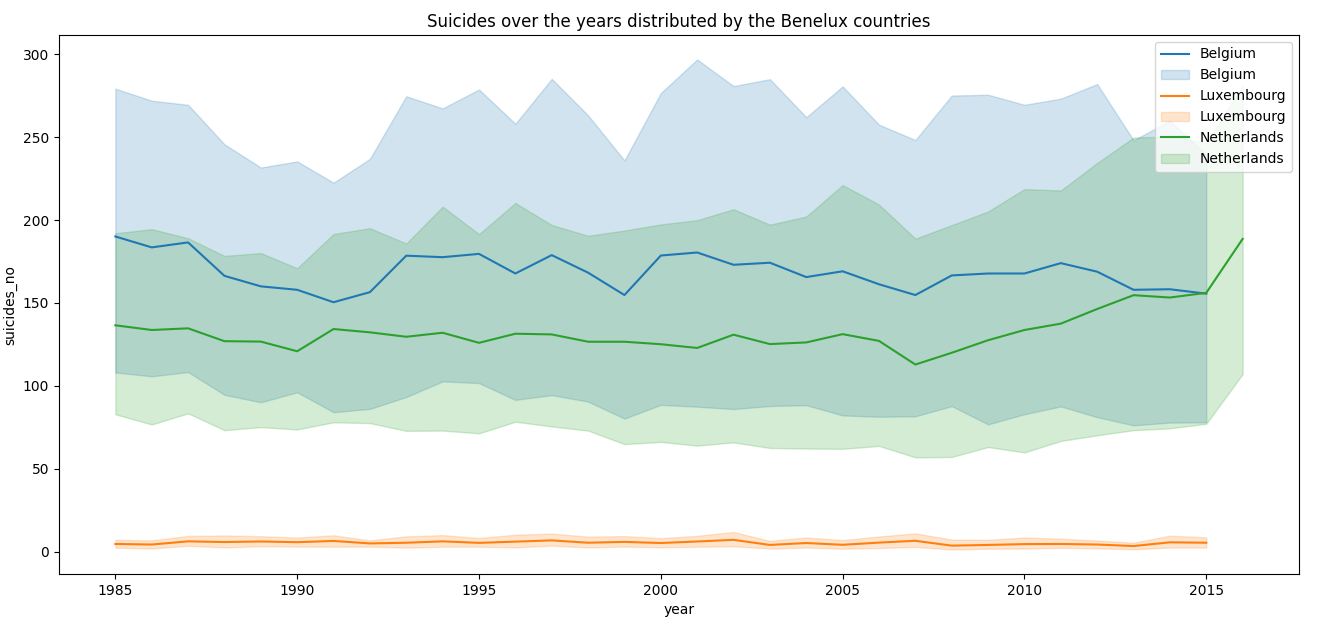